![Cover](https://pbs.twimg.com/media/FaEJNvdWIAEjZUQ?format=jpg&name=medium)

Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.

[Click to see my article on Support Vector Regression](https://medium.com/machine-learning-researcher/support-vector-machine-a57e575b05bb)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

<b>Bike Sharing Dataset:</b> 

<b> Link: </b> <br>
https://www.kaggle.com/code/gauravduttakiit/bike-sharing-multiple-linear-regression/data

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue> Import the Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#### <font color = blue>Import the Dataset

In [2]:
df = pd.read_csv("Dataset/Day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Summary and Visualization</font>

#### <font color = blue>Data shape

In [3]:
print("Number of columns:", df.shape[1])
print("Number of rows: ", df.shape[0])

Number of columns: 16
Number of rows:  730


#### <font color = blue>Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### <font color = blue>Data Description

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### <font color = blue> Check the Correaltion of Features

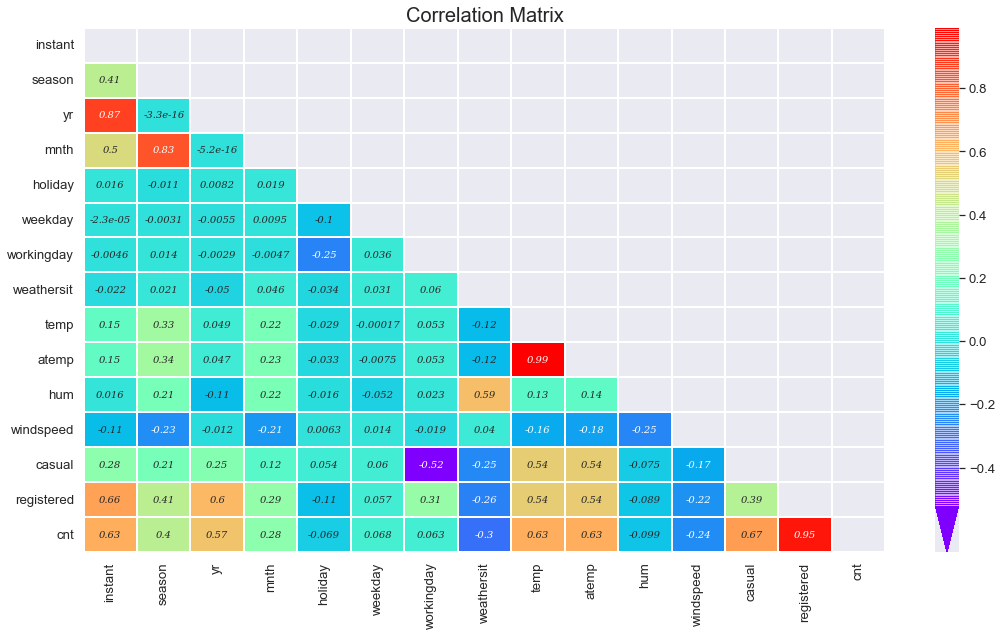

In [7]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Check Missing Value </font>

In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

no missig value found

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Remove Unwanted Columns </font>

In [10]:
df = df.drop(['instant', 'dteday'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Define Predictor and Target Attribute </font>

In [11]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

#### <font color = blue> Predictor Attribute

In [12]:
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518


#### <font color = blue> Target Attribute

In [13]:
Y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

### <font color = #27C3E5> 2.5: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### <font color = blue> Training Data

In [15]:
print("X_test", X_train.shape)
print("X_test", y_train.shape)

X_test (584, 13)
X_test (584,)


#### <font color = blue> Testing Data

In [16]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (146, 13)
X_test (146,)


### <font color = #27C3E5> 2.6: </font> <font color = #41EA46> Feature Scaling </font>

In [17]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

pd.DataFrame(X_test).head()  # Same Scale

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.439227,-0.989778,0.129950,-0.167836,1.491381,-1.486200,-0.719250,1.058888,1.020640,-0.294204,0.237423,2.298627,-0.092996
1,0.439227,-0.989778,0.129950,-0.167836,0.491993,0.672857,-0.719250,1.403349,1.317666,0.178544,-0.403795,-0.134854,0.126157
2,-1.367170,-0.989778,-1.608006,-0.167836,1.491381,-1.486200,1.155938,-1.406745,-1.363429,-0.909667,-0.419936,-0.912866,-1.724467
3,-1.367170,-0.989778,-1.318347,-0.167836,-0.507395,0.672857,1.155938,-1.630605,-1.446424,1.450965,-1.786740,-1.168791,-1.535588
4,-1.367170,1.010327,-1.608006,-0.167836,0.491993,0.672857,1.155938,-0.817529,-0.703860,1.022945,-1.523390,-0.880692,0.121550


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Build the Support Vector Regression </font>
In this part, we build the Support Vector Regression Model using Scikit-Learn

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> Import Model from Sklearn

In [18]:
from sklearn.svm import SVR

#### <font color = blue> Initialize the Model

In [19]:
regressor = SVR(kernel = 'rbf')

#### <font color = blue> Fit the Model

In [20]:
regressor.fit(X_train, y_train)

SVR()

#### <font color = blue> Predict the Test Data</font>

In [21]:
y_pred = regressor.predict(X_test)
y_pred

array([4554.69570874, 4559.01456586, 4475.32008376, 4475.91536063,
       4500.91182726, 4495.77342378, 4494.51465071, 4567.93405466,
       4535.92463898, 4467.99605245, 4462.70472636, 4476.90598541,
       4469.9565552 , 4553.69810866, 4556.69179214, 4518.89295874,
       4593.89003124, 4551.94916197, 4496.63504227, 4471.63018169,
       4602.8369389 , 4497.17755363, 4543.32085123, 4536.86373631,
       4485.46837213, 4575.37833298, 4547.03979605, 4559.02335118,
       4583.37971641, 4566.84510557, 4485.04635512, 4560.76872473,
       4586.68004938, 4552.65655338, 4489.70800901, 4503.6814789 ,
       4600.11623795, 4561.71785684, 4479.27117099, 4494.82691879,
       4499.54446893, 4475.47804512, 4548.79144095, 4495.01895451,
       4601.25956641, 4586.82125391, 4513.31250307, 4517.71365229,
       4491.23205448, 4475.5650061 , 4570.30093961, 4598.85947946,
       4564.11414092, 4593.42213785, 4535.6417382 , 4510.06933026,
       4502.83164153, 4568.02765931, 4598.94190151, 4488.73238

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the Decision Tree Regression Model. And for evaluation we will use three metrics. <br>
`R Square`: R Square measures how much variability in dependent variable can be explained by the model. <br>
`Mean Square Error`: MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. <br>
`Mean Absolute Error`: Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46>  Evaluate the Results </font>

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### <font color = blue>4.2.1: Calculate the Results

In [23]:
# R Square
R_Square = r2_score(y_pred, y_test)
print('R Square:', R_Square) 

# Mean Square Error
MSE = mean_squared_error(y_pred, y_test)
print('Mean Squared Error:', MSE)

# Mean Square Error
MAE = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', MAE)

R Square: -2984.0666514128243
Mean Squared Error: 4285876.164410747
Mean Absolute Error: 1724.4141097725844


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 5: </font> <font color = #4854E8> Making A Single Prediction </font>
In this part, we make a single Prediction based on new observation

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue>How many  count if ..?

In [30]:
col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

pd.DataFrame([[1, 0, 1, 0, 6, 0, 2, 16.33211, 19.18125, 79.5833, 11.749882, 331, 654, '?']], columns = col)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,16.33211,19.18125,79.5833,11.749882,331,654,?


In [29]:
regressor.predict(SS.transform(np.array([[1, 0, 1, 0, 6, 0, 2, 16.33211, 19.18125, 79.5833, 11.749882, 331, 654]])))

array([4479.62224299])

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<b>©</b>Amir Ali